# Data Science Day 2
<br> <br>

<div>
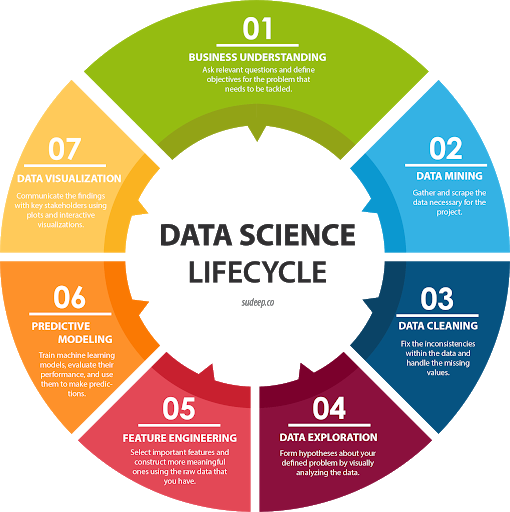
</div>

In [1]:
# import modules

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import csv containing car's information
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv'
cars_df = pd.read_csv(url)

In [3]:
# Inspect dataframe
cars_df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


## Feature types

__Numerical features__
<br>
There are two main types of numerical features: *discrete* and *continuous*
* Discrete: Age, Number of Sons/Daughters, number of inhabitants...
* Continuous: Distance, Size (Square meters)..
<br>

__Categorical features__
<br>
There are two main types of categorical features: *ordinal* and *nominal*
* Ordinal: If there is an order between the categories. Example: Dress size ('S', 'M', 'L', 'XL')
* Nominal: If there is no order. Example: Names of cities..



In [5]:
# Exercise - Define the type of each features of the cars_df

## Processing Categorical Features

First let's see some new python tools.
<br>
* __lambda function__: A quick way of defining a function
* __map method__: Apply a function to each element of a column


In [7]:
cars_df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


In [14]:
# lambda 
# Define a lambda function that convert a price in dollar into euros (1 euro = 1.22 dollar)
func = lambda x: x*1.22
func(20)

24.4

In [18]:
# map function
# Return the length of each element in a list
def myfunc(n):
      return len(n)

x = map(myfunc, ['apple', 'banana', 'cherry'])
print(list(x))

[5, 6, 6]


### Process Ordinal Features

In [17]:
import random

In [19]:
# Define an 100 list containing a random distribution of Great, Good, Okay, Bad, Poor categories
rank_list = ["Great", "Good", "Okay", "Bad", "Poor"]
items = pd.Series([random.choice(rank_list) for i in range(100)])

# Encoding dictionnary
size_dict = {'Poor': 0, 'Bad':1, 'Okay':2, 'Good':3, 'Great':4}

# Encode the items list
encoded_items = items.map(lambda x: size_dict[x])

# Display a Dataframe with two columns "Rank" and "Encoded Rank"
pd.DataFrame({"Rank":items, "Encoded Rank":encoded_items})

,Rank,Encoded Rank
0,Great,4
1,Okay,2
2,Good,3
3,Good,3
4,Poor,0
...,...,...
95,Great,4
96,Bad,1
97,Bad,1
98,Okay,2


To go further look at sklearn package:
* OrdinalEncoder : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [26]:
# Exercise - With cars_df
# 1. Display the unique categories of Type

In [27]:
# 2. Process the type column accordingly. {'Small':1, 'Midsize':2...}

### Process Nominal Features

__One Hot Encoding__ 

In [28]:
# Import data
flowers_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [29]:
# Inspect data

In [30]:
flowers_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
# One Hot Encoding - pd.get_dummies
pd.get_dummies(flowers_df, columns=['species'])

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


To go further look at sklearn package:
* LabelEncoder : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

__Target Encoding__

In [37]:
# Create a new dataframe from cars_df with only two columns: Manufacturer, Price
cars_df_filtered = cars_df[['Manufacturer', 'Price']]

In [38]:
# Display the new dataframe
cars_df_filtered.head()

,Manufacturer,Price
0,Acura,15.9
1,NaN,33.9
2,Audi,29.1
3,Audi,37.7
4,BMW,30.0


In [41]:
means = cars_df_filtered[['Manufacturer', 'Price']].groupby('Manufacturer').mean()
means.head()

,Price
Manufacturer,
Acura,15.900
Audi,33.400
BMW,30.000
Buick,21.625
Cadillac,37.400


In [45]:
cars_df_filtered['Manufacturer_transformed'] = cars_df_filtered['Manufacturer'].dropna().apply(lambda x: means.loc[x, "Price"])

<ipython-input-45-75c9ff9155c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df_filtered['Manufacturer_transformed'] = cars_df_filtered['Manufacturer'].dropna().apply(lambda x: means.loc[x, "Price"])


In [46]:
# Display updated dataframe
cars_df_filtered.head()

,Manufacturer,Price,Manufacturer_transformed
0,Acura,15.9,15.9
1,NaN,33.9,NaN
2,Audi,29.1,33.4
3,Audi,37.7,33.4
4,BMW,30.0,30.0


__Exercises__
- Using the Cars dataset, perform label encoding on the Make column

- Target encode the Model column by a statistic of your choice.

### Process Numerical Features

__Scaling__

Example of scaling methods:

* *Min-Max Normalization* - Scales all the data between [0, 1] as a default but you can pick any 2 numbers to scale between. See MinMaxScaler in sklearn.


* *Standarization* - Standard scaling subtracts the mean and divides by the standard deviation. This centers the feature on zero with unit variance. See StandardScaler in sklearn.

In [51]:
cars_df.shape

(93, 28)

In [49]:
# Display statistical information about the Weight feature
cars_df['Weight'].describe()

count      86.000000
mean     3104.593023
std       600.129993
min      1695.000000
25%      2647.500000
50%      3085.000000
75%      3567.500000
max      4105.000000
Name: Weight, dtype: float64

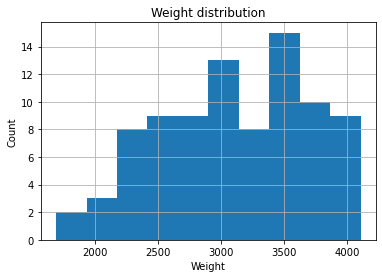

In [57]:
cars_df['Weight'].hist()
plt.title('Weight distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

__Observation__

We can see that the weights take values between 1695 and 4105, has a mean of 3104 with a standard deviation of 600.

__Goal__

Some machine learning models perform better if continuous features are normalized. Let's normalize the Weight Feature with the StandardScaler object (from sklearn package)

In [58]:
# Import Scaler objects from sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [70]:
cars_df['Weight']

0     2705.0
1     3560.0
2     3375.0
3     3405.0
4     3640.0
       ...  
88    3960.0
89    2985.0
90    2810.0
91    2985.0
92    3245.0
Name: Weight, Length: 93, dtype: float64

__Standard Scaler__

In [72]:
# Initialize a StandardScaler object
s_scaler = StandardScaler()
# Scale the Weight feature (We have to reshape it because Scaler only takes 2d arrays)
weight_scaled = s_scaler.fit_transform(cars_df['Weight'].values.reshape(-1,1))
# Create a new column
cars_df['weight_scaled'] = weight_scaled

In [73]:
# Compare the stasticial information of the scaled data with the old one.
cars_df[['Weight', 'weight_scaled']].describe()

,Weight,weight_scaled
count,86.000000,8.600000e+01
mean,3104.593023,2.517366e-17
std,600.129993,1.005865e+00
min,1695.000000,-2.362589e+00
25%,2647.500000,-7.661239e-01
50%,3085.000000,-3.283945e-02
75%,3567.500000,7.758686e-01
max,4105.000000,1.676761e+00


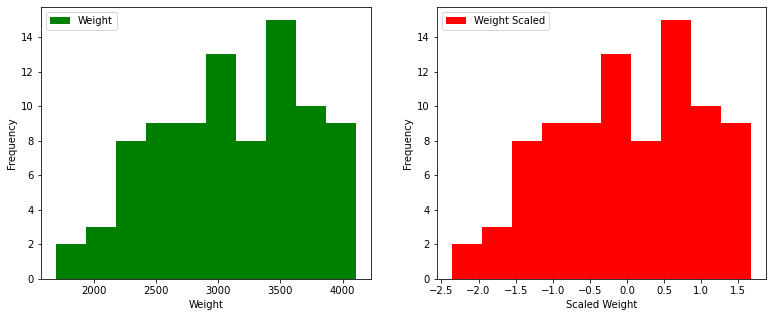

In [77]:
fig, ax = plt.subplots(1,2,figsize=(13, 5))

ax[0].hist(cars_df['Weight'], color='g', label='Weight')
ax[1].hist(cars_df['weight_scaled'], color='r', label='Weight Scaled')

ax[0].legend()
ax[1].legend()

ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[0].set_xlabel('Weight')
ax[1].set_xlabel('Scaled Weight')

plt.show()

In [78]:
# Exercise do the same transformation with MinMaxScaler

__Log Transformation__

In case we have skewed data, meaning many extreme values, in some case we want to apply a log transformation for the data to be more in a normal distribution.

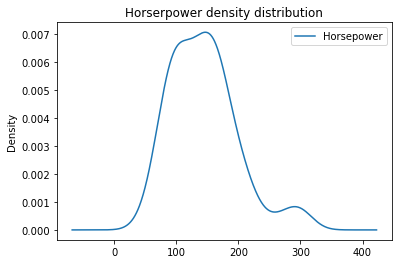

In [86]:
# Inspect the distribution of the Horsepower feature

cars_df['Horsepower'].plot(kind = 'kde')
plt.title('Horserpower density distribution')
plt.legend()
plt.show()

We observe a 'bump' near 300, we say in that case the distribution is right-skewed. Now we want to have a more normal like distribution.

In [87]:
# Import FunctionTransformer object
from sklearn.preprocessing import FunctionTransformer

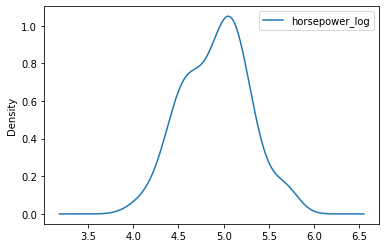

In [103]:
# Initialize an FunctionTransformer object
transformer = FunctionTransformer(np.log1p, validate=True)
horsepower_transformed =  transformer.transform(cars_df['Horsepower'].dropna().values.reshape(-1, 1))

horsepower_df = pd.DataFrame(horsepower_transformed, columns=['horsepower_log']) 

# Plot the new distribution
horsepower_df.plot(kind = 'kde')
plt.show()

The distribution is no longer skewed

__Binning__

Binning is the transformation of a numerical variable into a categorical one.

In [105]:
pd.cut?

In [107]:
data = pd.DataFrame({'age':[10,20,40,50,44,56,12,34,56, 75, 87, 22, 13, 34, 42, 43, 52]})
data['agebinned'] = pd.cut(data.age, bins=range(0, 101, 10), retbins=False,include_lowest=True)
data

,age,agebinned
0,10,"(-0.001, 10.0]"
1,20,"(10.0, 20.0]"
2,40,"(30.0, 40.0]"
3,50,"(40.0, 50.0]"
4,44,"(40.0, 50.0]"
5,56,"(50.0, 60.0]"
6,12,"(10.0, 20.0]"
7,34,"(30.0, 40.0]"
8,56,"(50.0, 60.0]"
9,75,"(70.0, 80.0]"


In [116]:
# Check the repartition of the new category
data['agebinned'].value_counts()

(40.0, 50.0]      4
(50.0, 60.0]      3
(30.0, 40.0]      3
(10.0, 20.0]      3
(80.0, 90.0]      1
(70.0, 80.0]      1
(20.0, 30.0]      1
(-0.001, 10.0]    1
(90.0, 100.0]     0
(60.0, 70.0]      0
Name: agebinned, dtype: int64

In [117]:
# Exercise
# - Use binning to divide the Weight feature into 4 bins and then label encode the bins.
# Add this new column to the DataFrame

## Outliers and Null Values

In [118]:
# Summary of cars_df
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              89 non-null     object 
 1   Model                     92 non-null     object 
 2   Type                      90 non-null     object 
 3   Min.Price                 86 non-null     float64
 4   Price                     91 non-null     float64
 5   Max.Price                 88 non-null     float64
 6   MPG.city                  84 non-null     float64
 7   MPG.highway               91 non-null     float64
 8   AirBags                   87 non-null     object 
 9   DriveTrain                86 non-null     object 
 10  Cylinders                 88 non-null     object 
 11  EngineSize                91 non-null     float64
 12  Horsepower                86 non-null     float64
 13  RPM                       90 non-null     float64
 14  Rev.per.mile

In [120]:
# Display the number of nas for each features
cars_df.isna().sum()

Manufacturer                 4
Model                        1
Type                         3
Min.Price                    7
Price                        2
Max.Price                    5
MPG.city                     9
MPG.highway                  2
AirBags                      6
DriveTrain                   7
Cylinders                    5
EngineSize                   2
Horsepower                   7
RPM                          3
Rev.per.mile                 6
Man.trans.avail              5
Fuel.tank.capacity           8
Passengers                   2
Length                       4
Wheelbase                    1
Width                        6
Turn.circle                  5
Rear.seat.room               4
Luggage.room                19
Weight                       7
Origin                       5
Make                         3
Manufacturer_transformed     5
weight_scaled                7
dtype: int64

In [122]:
# Display the rate of nas for each features
(cars_df.isna().sum() / cars_df.shape[0]).round(2)

Manufacturer                0.04
Model                       0.01
Type                        0.03
Min.Price                   0.08
Price                       0.02
Max.Price                   0.05
MPG.city                    0.10
MPG.highway                 0.02
AirBags                     0.06
DriveTrain                  0.08
Cylinders                   0.05
EngineSize                  0.02
Horsepower                  0.08
RPM                         0.03
Rev.per.mile                0.06
Man.trans.avail             0.05
Fuel.tank.capacity          0.09
Passengers                  0.02
Length                      0.04
Wheelbase                   0.01
Width                       0.06
Turn.circle                 0.05
Rear.seat.room              0.04
Luggage.room                0.20
Weight                      0.08
Origin                      0.05
Make                        0.03
Manufacturer_transformed    0.05
weight_scaled               0.08
dtype: float64

In [126]:
# Let's see an example
cars_df['MPG.city'].head(20)

0     25.0
1     18.0
2     20.0
3     19.0
4     22.0
5     22.0
6     19.0
7     16.0
8     19.0
9     16.0
10    16.0
11    25.0
12    25.0
13    19.0
14     NaN
15    18.0
16    15.0
17    17.0
18    17.0
19    20.0
Name: MPG.city, dtype: float64

In [127]:
mpg_city = cars_df['MPG.city'].head(20)
# drop na
mpg_city.dropna()

0     25.0
1     18.0
2     20.0
3     19.0
4     22.0
5     22.0
6     19.0
7     16.0
8     19.0
9     16.0
10    16.0
11    25.0
12    25.0
13    19.0
15    18.0
16    15.0
17    17.0
18    17.0
19    20.0
Name: MPG.city, dtype: float64

In [128]:
# replace na with 0
mpg_city.fillna(0)

0     25.0
1     18.0
2     20.0
3     19.0
4     22.0
5     22.0
6     19.0
7     16.0
8     19.0
9     16.0
10    16.0
11    25.0
12    25.0
13    19.0
14     0.0
15    18.0
16    15.0
17    17.0
18    17.0
19    20.0
Name: MPG.city, dtype: float64

## Data splitting

In [129]:
# import train_test_split object 
from sklearn.model_selection import train_test_split

In [130]:
# Create some false data
X, y = np.arange(10).reshape((5, 2)), range(5)

In [131]:
# Split it in two with a 0.77/0.33 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)